
# <center>TRABAJO PRACTICO 1</center>
#### <center>Organizacion de Datos </center>

## <center>GRUPO 3</center>
### <center> Integrantes: Miguel Vazquez - Facundo Monpelat - Ramiro Gestoso - Gaston Avila - Paula Bruck</center>

In [1]:
!ls

properati_argentina_2021.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


 #### Cargamos el dataset de prosperati

In [45]:
ds_properati = pd.read_csv('properati_argentina_2021.csv')

## 1. Análisis exploratorio y preprocesamiento de datos

### a) Exploración inicial

Se realiza un primer vistazo general del dataset

En principio se observa la cantidad de observaciones y features contenidas:

In [46]:
shape = ds_properati.shape
print("Filas: %d Columnas: %d" % (shape[0], shape[1]))

Filas: 460154 Columnas: 20


In [5]:
ds_properati.head()

,id,start_date,end_date,created_on,latitud,longitud,place_l2,place_l3,place_l4,place_l5,place_l6,operation,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_currency,property_title
0,XZq2dFGxBiboHY3Bo/tqlw==,2021-09-09,2022-01-27,2021-09-09,-38.957632,-68.105443,Neuquén,NaN,NaN,NaN,NaN,Venta,Casa,6.0,NaN,NaN,206.0,NaN,NaN,Casa - Capital
1,8afoK+yMH/rnnlYiktwgNA==,2021-09-09,2021-10-23,2021-09-09,-34.888878,-56.092368,Montevideo,NaN,NaN,NaN,NaN,Venta,Casa,4.0,3.0,193.0,193.0,390000.0,USD,Casa - Malvín
2,iVaG5rBB47dd1Ya4BMXREA==,2021-09-09,2022-03-09,2021-09-09,-32.488717,-58.257499,Entre Ríos,NaN,NaN,NaN,NaN,Venta,Casa,NaN,NaN,110.0,45.0,47000.0,USD,Casa - Uruguay
3,QE1QVMWKAHWkd0qT0FtPWA==,2021-09-09,2022-01-27,2021-09-09,-34.900165,-54.808453,Maldonado,NaN,NaN,NaN,NaN,Venta,Casa,NaN,3.0,NaN,180.0,400000.0,USD,Casa - El Chorro
4,tJ5lSk7IysG/71OGhacNZA==,2021-09-09,2022-01-27,2021-09-09,-38.954528,-68.041862,Neuquén,NaN,NaN,NaN,NaN,Venta,PH,3.0,2.0,NaN,98.0,102000.0,USD,PH - Villa Farrell


In [47]:
ds_properati.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460154 entries, 0 to 460153
Data columns (total 20 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        460154 non-null  object 
 1   start_date                460154 non-null  object 
 2   end_date                  460154 non-null  object 
 3   created_on                460154 non-null  object 
 4   latitud                   419740 non-null  float64
 5   longitud                  419740 non-null  float64
 6   place_l2                  460154 non-null  object 
 7   place_l3                  437665 non-null  object 
 8   place_l4                  139020 non-null  object 
 9   place_l5                  2430 non-null    object 
 10  place_l6                  0 non-null       float64
 11  operation                 460154 non-null  object 
 12  property_type             460154 non-null  object 
 13  property_rooms            368498 non-null  f

Las variables cuantitativas vemos del analisis que son:
- latitud
- longitud
- place_l6 (despues vemos que esta columna esta mal categorizada, tiene mal el dtype)
- property_rooms
- property_surface_total
- property_surface_covered
- property_price

In [48]:

ds_properati[
    ['latitud',
    'longitud',
    'property_rooms',
    'property_surface_total',
    'property_surface_covered',
    'property_price']
    ].describe()

,latitud,longitud,property_rooms,property_surface_total,property_surface_covered,property_price
count,419740.000000,419740.000000,368498.000000,397813.000000,4.279160e+05,4.421530e+05
mean,-34.228570,-59.557066,3.278053,420.601250,9.605005e+03,3.063273e+05
std,3.251509,2.905129,1.870832,4026.380748,3.440367e+06,4.899613e+06
min,-54.832057,-103.219258,1.000000,-1.000000,-3.000000e+00,0.000000e+00
25%,-34.640132,-58.899343,2.000000,50.000000,4.500000e+01,4.490000e+04
50%,-34.585122,-58.488309,3.000000,90.000000,7.800000e+01,9.800000e+04
75%,-34.423414,-58.404876,4.000000,210.000000,1.700000e+02,1.990000e+05
max,42.557773,-35.044991,40.000000,200000.000000,2.147484e+09,1.500000e+09


las variables cualitativas:
- start_date
- end_date
- created_on
- operation
- place_l2
- place_l3
- place_l4
- place_l5
- property_type
- property_currency
- property_title


### Convertimos las fechas a tipo date ya que corresponden a variables cuantitativas

In [52]:
ds_properati['start_date'] = pd.to_datetime(ds_properati['start_date'], errors='coerce')
ds_properati['end_date'] = pd.to_datetime(ds_properati['end_date'], errors='coerce')
ds_properati['created_on'] = pd.to_datetime(ds_properati['created_on'], errors='coerce')

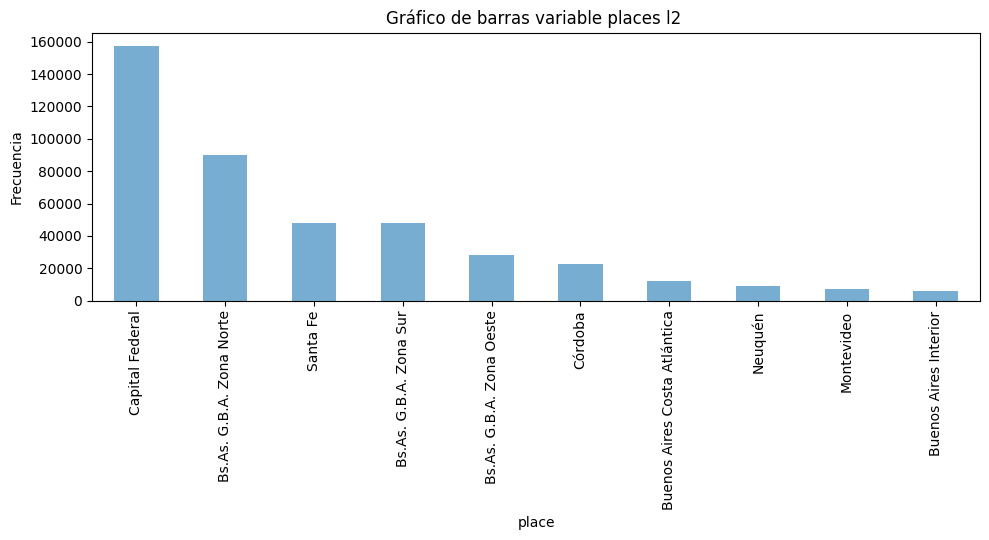

In [53]:
grf_a4= ds_properati.place_l2.value_counts()[:10].plot.bar(alpha=0.6 , title="Gráfico de barras variable places l2 " , xlabel="place" , ylabel="Frecuencia") 

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Capital Federal'),
  Text(1, 0, 'Bs.As. G.B.A. Zona Norte'),
  Text(2, 0, 'Santa Fe'),
  Text(3, 0, 'Bs.As. G.B.A. Zona Sur'),
  Text(4, 0, 'Bs.As. G.B.A. Zona Oeste'),
  Text(5, 0, 'Córdoba'),
  Text(6, 0, 'Buenos Aires Costa Atlántica'),
  Text(7, 0, 'Neuquén'),
  Text(8, 0, 'Montevideo'),
  Text(9, 0, 'Buenos Aires Interior')])

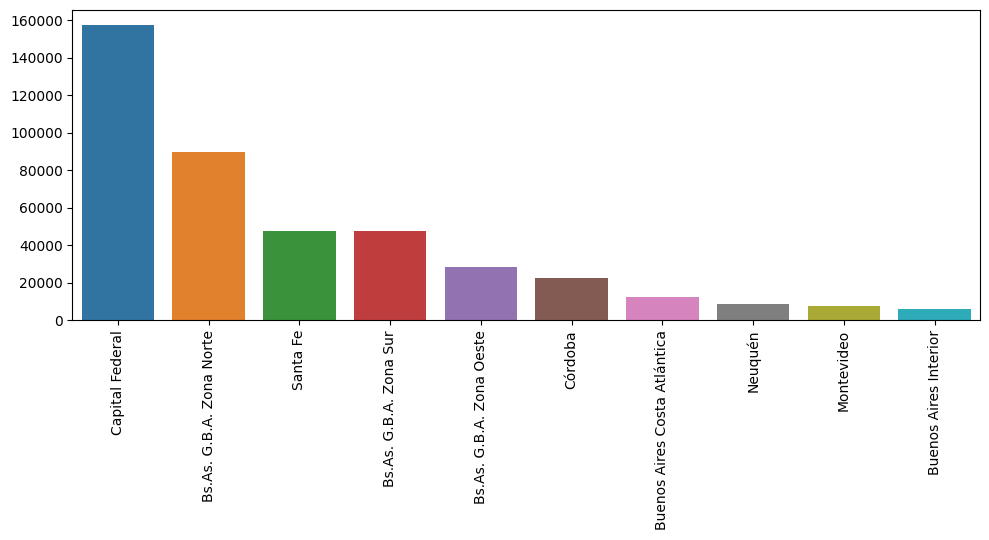

In [54]:
zonas = ds_properati['place_l2'].value_counts().head(10)
sns.barplot(x=zonas.index, y=zonas.values)
plt.xticks(rotation=90)

Graficamos algunas variables cualitativas

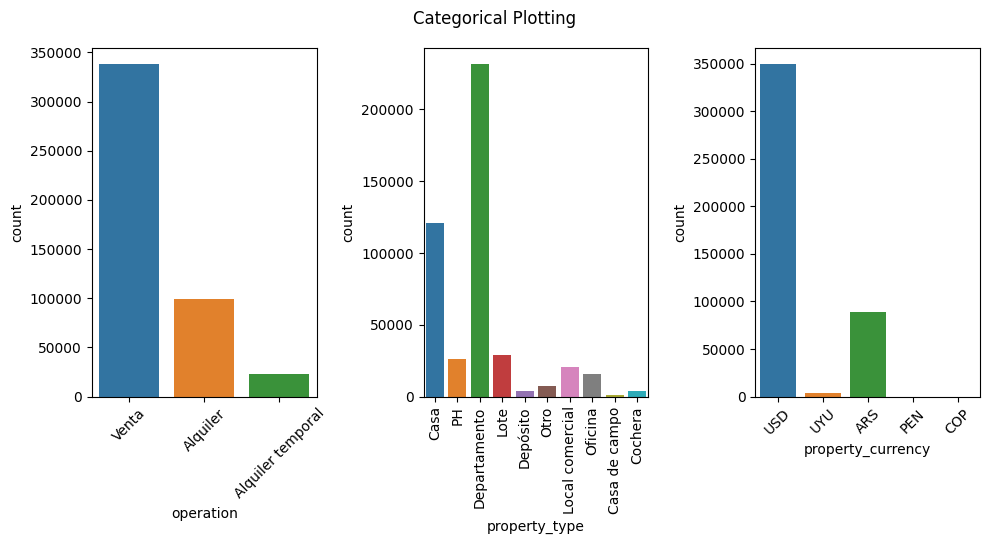

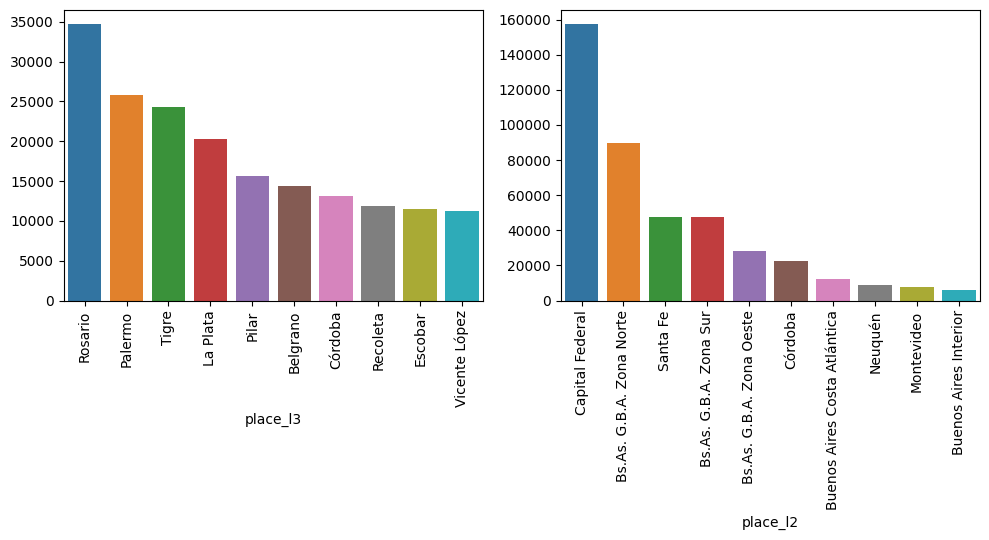

In [11]:

plt.rcParams["figure.figsize"] = [10.00, 5.50]
plt.rcParams["figure.autolayout"] = True
fig, ax = plt.subplots(1,3)
fig.suptitle('Categorical Plotting')
sns.countplot(x='operation', data=ds_properati, ax = ax[0])
plt.sca(ax[0])
plt.xticks(rotation=45)

sns.countplot(x='property_type', data=ds_properati, ax = ax[1])
plt.sca(ax[1])
plt.xticks(rotation=90)

sns.countplot(x='property_currency', data=ds_properati, ax = ax[2])
plt.sca(ax[2])
plt.xticks(rotation=45)

fig.show()


fig, ax = plt.subplots(1,2)
zonas = ds_properati['place_l2'].value_counts().head(10)
sns.barplot(x=zonas.index, y=zonas.values)
plt.xlabel('place_l2')
plt.xticks(rotation=90)
plt.sca(ax[0])

zonas = ds_properati['place_l3'].value_counts().head(10)
sns.barplot(x=zonas.index, y=zonas.values)
plt.xlabel('place_l3')
plt.xticks(rotation=90)
plt.sca(ax[1])

#sns.countplot(x='place_l2', data=ds_properati, ax = ax[0])
#plt.sca(ax[0])
#plt.xticks(rotation=90)

#sns.countplot(x='place_l3', data=ds_properati, ax = ax[1])
#plt.sca(ax[0])
#plt.xticks(rotation=90)

#sns.countplot(x='place_l4', data=ds_properati, ax = ax[2])
#plt.sca(ax[0])
#plt.xticks(rotation=90)

fig.show()


revisamos la variable property_title

### Variables irrelevantes

Considerando que la única utilidad que tiene la columna ID, para nuestro caso de estudio, es para el uso del archivo de descripciones, la consideramos irrelevante. A su vez tambien podemos agregar, dentro de esta categoria, a "place_l5" y "place_l6" que tienen todos, o casi todos sus datos incompletos.

In [12]:
ds_properati.drop(['id', 'place_l5', 'place_l6'], axis=1, inplace = True)

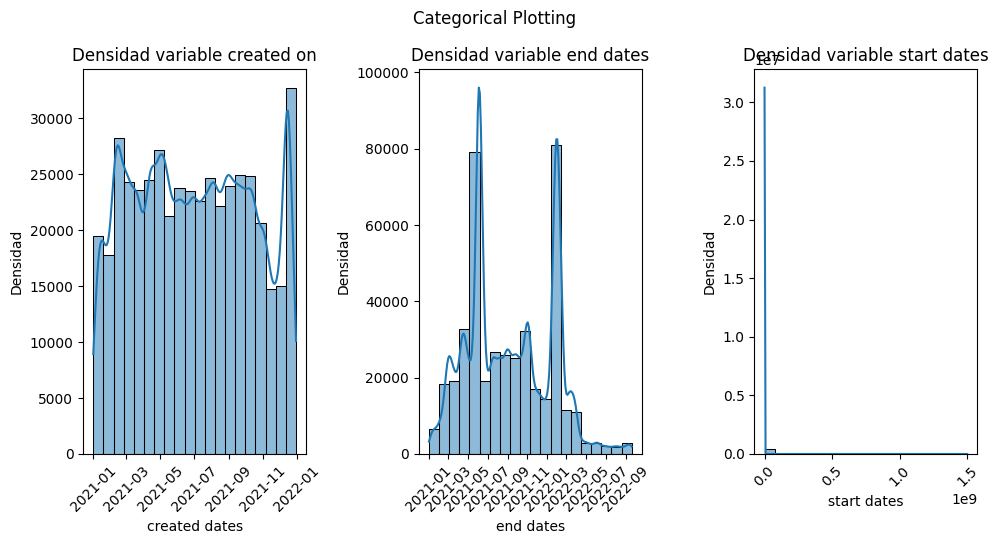

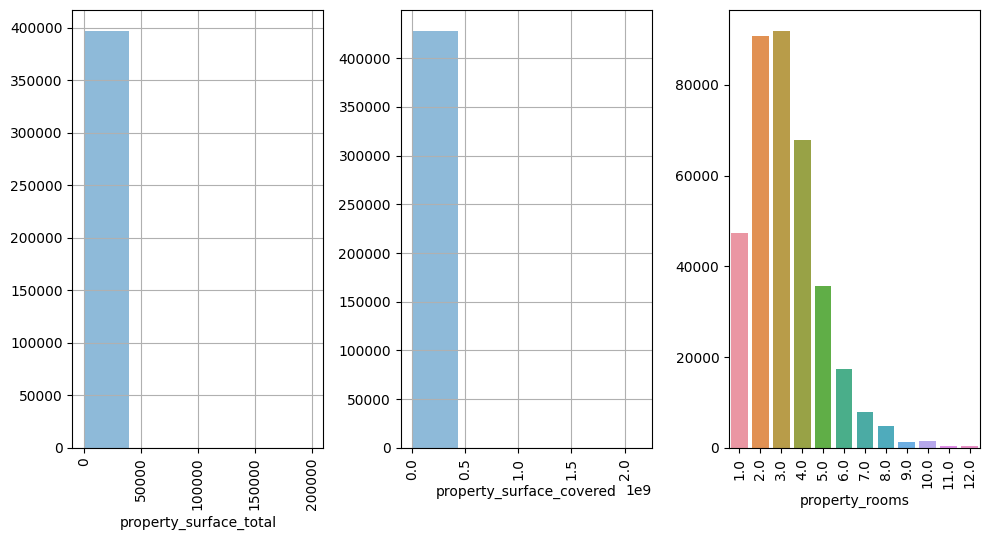

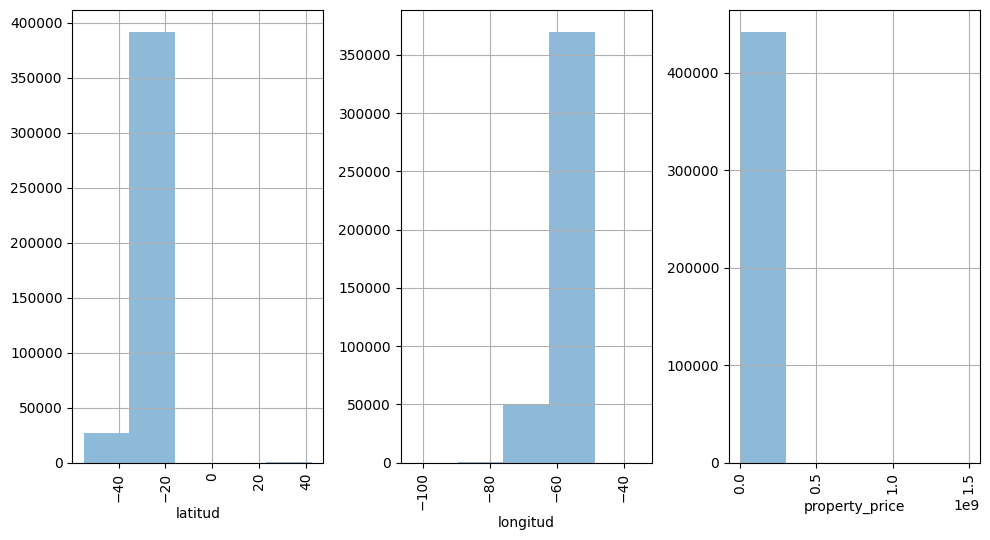

In [115]:
plt.rcParams["figure.figsize"] = [10.00, 5.50]
plt.rcParams["figure.autolayout"] = True
fig, ax = plt.subplots(1,3)
fig.suptitle('Categorical Plotting')
sns_hist=sns.histplot(bins=20, data=ds_properati['property_price'], kde=True, alpha = 0.5).set(title="Densidad variable start dates",xlabel="start dates",ylabel="Densidad")
plt.sca(ax[0])
plt.xticks(rotation=45)

sns_hist=sns.histplot(bins=20, data=ds_properati['created_on'], kde=True, alpha = 0.5).set(title="Densidad variable created on",xlabel="created dates",ylabel="Densidad")
plt.sca(ax[1])
plt.xticks(rotation=45)

sns_hist=sns.histplot(bins=20, data=ds_properati['end_date'], kde=True, alpha = 0.5).set(title="Densidad variable end dates",xlabel="end dates",ylabel="Densidad")
plt.sca(ax[2])
plt.xticks(rotation=45)

fig.show()

fig, ax = plt.subplots(1,3)

rooms=ds_properati['property_rooms'].value_counts().head(12)
sns.barplot(x=rooms.index, y=rooms.values)
plt.xlabel('property_rooms')
plt.sca(ax[0])
plt.xticks(rotation=90)

grf=ds_properati['property_surface_total'].hist(alpha=0.5,bins=5)
plt.xlabel('property_surface_total')
plt.sca(ax[1])
plt.xticks(rotation=90)


grf=ds_properati['property_surface_covered'].hist(alpha=0.5,bins=5)
plt.xlabel('property_surface_covered')
plt.sca(ax[2])
plt.xticks(rotation=90)

fig.show()
fig, ax = plt.subplots(1,3)
grf=ds_properati['property_price'].hist(alpha=0.5,bins=5)
plt.xlabel('property_price')
plt.sca(ax[0])
plt.xticks(rotation=90)

grf=ds_properati['latitud'].hist(alpha=0.5,bins=5)
plt.xlabel('latitud')
plt.sca(ax[1])
plt.xticks(rotation=90)

grf=ds_properati['longitud'].hist(alpha=0.5,bins=5)
plt.xlabel('longitud')
plt.sca(ax[2])
plt.xticks(rotation=90)

fig.show()


## Analisis de correlacion de variables

<AxesSubplot:>

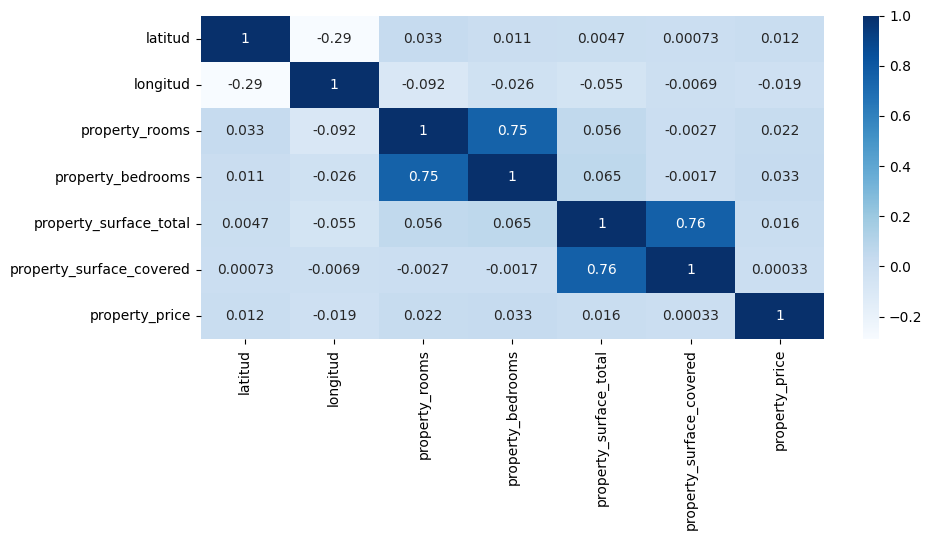

In [19]:
sns.heatmap(data=ds_properati.corr(), annot=True, cmap='Blues')

### Pares de variables con alta correlacion:

* property_rooms & property_bedrooms -> correlacion positiva

* property_surface_covered & property_surface_total -> correlacion positiva

En ambos casos tiene sentido que exista una correlacion. La cantidad de 'bedrooms' siempre va a estar limitada superiormente por la cantidad de 'rooms'. Algo parecido sucede con la superficie cubierta sobre la superficie total. Nunca se prodrá cubrir mas que el total.

Estas condiciones, en los dos casos, explican la razon de la correlación y por qué tienen sentido.

Sin embargo, mirando los graficos de dispersion, podemos observar que algunas de estas "reglas" no se cumplen, lo que conduce a posibles valores atipicos, ya que no tienen sentido (aquellos puntos que estén por encima de la recta verde). Por ejemplo, en el segundo grafico podemos ver que hay casos de superficie cubierta mayor a la superficie total, lo cual no tiene sentido. Algo parecido pasa con el primer grafico.

Todos estos aspectos se analizarán en la sección de valores atipicos.

<AxesSubplot:xlabel='property_surface_total', ylabel='property_surface_covered'>

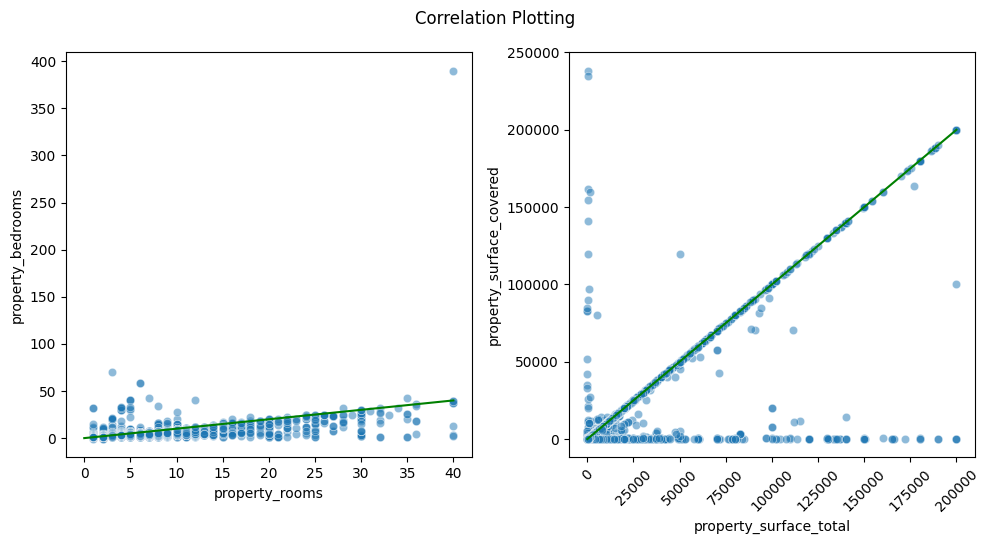

In [118]:
correlacion1 = ds_properati[['property_rooms', 'property_bedrooms']]
correlacion2 = ds_properati[['property_surface_covered', 'property_surface_total']]
max_rooms = correlacion1['property_rooms'].max()
max_surface_total = correlacion2['property_surface_total'].max()

fig, ax = plt.subplots(1, 2)
fig.suptitle('Correlation Plotting')
sns.scatterplot(x='property_rooms', y='property_bedrooms',data=correlacion1, ax = ax[0], alpha=0.5)
sns.lineplot(x=[0,max_rooms], y=[0,max_rooms], ax = ax[0], c='Green')
sns.scatterplot(x='property_surface_total', y='property_surface_covered',data=correlacion2, ax = ax[1], alpha=0.5)
plt.xticks(rotation=45)
sns.lineplot(x=[0,max_surface_total], y=[0,max_surface_total], ax = ax[1], c='Green')

### b) Datos faltantes

In [ ]:
nullable_percentages = (ds_properati.isnull().sum() / ds_properati.shape[0]) * 100

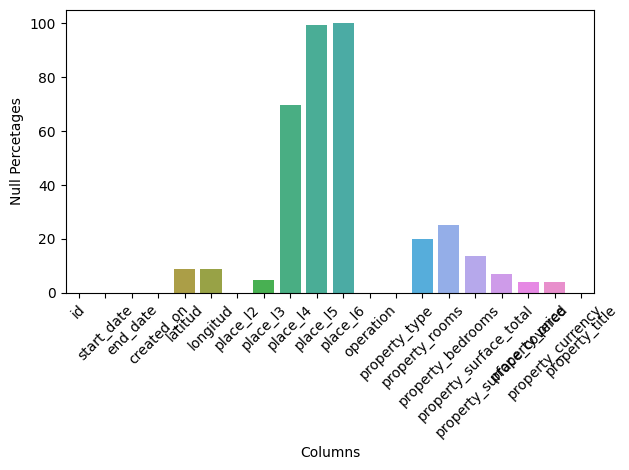

In [ ]:
sns.barplot(x=nullable_percentages.index, y=nullable_percentages.values)
plt.xticks(rotation=45)
plt.ylabel("Null Percetages")
plt.xlabel("Columns")
plt.tight_layout()

vemos que la columna place_l6 esta vacia su count da cero. tambien la columna place_l5 ya que tiene un porcentaje de nulos de 0.99

### c) Valores atípicos

### d) Reducción de la dimensionalidad

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=7da1cea6-caf2-4c30-b019-068f1fb82c77' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>